# Stage 1

In [1]:
#import block
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
import colorama as cr
import matplotlib.pyplot as plt

In [2]:
#this turns a set of 3-character strings into a single one-hot encoded array
def transformVector(d):
    l = len(charlist)
    d = eval(d)
    v = np.zeros(l**3).astype('uint64') #makes a numpy array the length of the charlist cubed populated with zeros
    for string in d:
        num = charlist.index(string[0])*l*l + charlist.index(string[1])*l + charlist.index(string[2])
        v[num] = 1
    return v

In [3]:
df = pd.read_csv("/kaggle/input/vectorfile-version-2/vectorfilev3.csv") #read the training data into a pandas dataframe

In [4]:
#this creates three columns: one for algorithm 1, one for algorithm 2, and one for unpacked. For each row, the respective algorithm will have a 1 and the other two will have a 0
df['algo1'] = 0
df['algo2'] = 0
df['unpacked'] = 0
for row in df.index:
    try:
        if str(df['name'][row]).split('/')[3] == 'algo1':
            df.loc[row, 'algo1']= 1
        elif str(df['name'][row]).split('/')[3] == 'algo2':
            df.loc[row, 'algo2' ] =1
    except:
        df.loc[row, 'unpacked']=  1 
df.head()

,name,vector,algo1,algo2,unpacked
0,initdirectory/script1.py,"{'ave', 'in*', '#s*', 'lik', 'at#', '*an', 'at...",0,0,1
1,initdirectory/script2.py,"{'#pl', 'es#', 'rre', 'f*w', 'ef*', 's#5', 's#...",0,0,1
2,initdirectory/script3.py,"{'ame', 'r*n', 'nre', 'lik', 'our', 'at*', 'im...",0,0,1
3,initdirectory/script4.py,"{'d#*', 'oti', 'snu', '#pl', 'our', 'at*', '*a...",0,0,1
4,initdirectory/script5.py,"{'usl', 'y#4', '*ga', '*qu', 'p#2', 'fre', 'oi...",0,0,1


In [5]:
#the charlist contains every possible character that is included in this classification system
charlist = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '#', '*']
df['enumerated'] = df['vector'].apply(transformVector)

# Stage 2

In [6]:
#more importing
from tensorflow import keras
from tensorflow.keras import layers
print(df.columns)
import tensorflow as tf

Index(['name', 'vector', 'algo1', 'algo2', 'unpacked', 'enumerated'], dtype='object')


In [7]:
#this creates a "Y" column containing the information in algo1, algo2, and unpacked.
def create_y(row):
    return [row['algo1'], row['algo2'], row['unpacked']]
df['Y'] = df.apply(create_y, axis=1)
df.head()

,name,vector,algo1,algo2,unpacked,enumerated,Y
0,initdirectory/script1.py,"{'ave', 'in*', '#s*', 'lik', 'at#', '*an', 'at...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
1,initdirectory/script2.py,"{'#pl', 'es#', 'rre', 'f*w', 'ef*', 's#5', 's#...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
2,initdirectory/script3.py,"{'ame', 'r*n', 'nre', 'lik', 'our', 'at*', 'im...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
3,initdirectory/script4.py,"{'d#*', 'oti', 'snu', '#pl', 'our', 'at*', '*a...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
4,initdirectory/script5.py,"{'usl', 'y#4', '*ga', '*qu', 'p#2', 'fre', 'oi...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"


In [8]:
#this converts the data into numpy arrays
X = np.array(df['enumerated'].to_numpy().tolist())
y = np.array(df['Y'].to_numpy().tolist())
#defining the testing and training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [9]:
#this is so that we do not have to keep re-training the model since the data has not changed
model = keras.models.load_model('/kaggle/input/code-classifier/keras/simplified/1/model.keras') 

In [10]:
def accuracyof1(prediction, actual):
    prediction = np.argmax(prediction)
    actual = np.argmax(actual)
    return (prediction == actual)

In [11]:
accuracy = 0
count = 0
for i in range(132):
    prediction = model.predict(X_train[i].reshape(1, -1), verbose = 'False')
    print("Prediction: ", prediction)
    print("Actual: ", y_train[i])
    if accuracyof1(prediction, y_train[i]):
        accuracy += 1
    count += 1
accuracy = (accuracy/count)*100

Prediction:  [[0.983166   0.01406681 0.00276729]]
Actual:  [1 0 0]
Prediction:  [[0.0098802  0.98854315 0.0015766 ]]
Actual:  [0 1 0]
Prediction:  [[9.9479359e-01 4.3081031e-03 8.9827244e-04]]
Actual:  [1 0 0]
Prediction:  [[0.98762274 0.01019828 0.00217906]]
Actual:  [1 0 0]
Prediction:  [[3.4131514e-05 2.8563725e-05 9.9993730e-01]]
Actual:  [0 0 1]
Prediction:  [[0.9856317  0.0121148  0.00225344]]
Actual:  [1 0 0]
Prediction:  [[0.98430693 0.01311856 0.00257452]]
Actual:  [1 0 0]
Prediction:  [[0.01443423 0.98321146 0.00235429]]
Actual:  [0 1 0]
Prediction:  [[0.9728485  0.02284291 0.00430858]]
Actual:  [1 0 0]
Prediction:  [[0.99090004 0.00753021 0.00156971]]
Actual:  [1 0 0]
Prediction:  [[0.01433358 0.98339427 0.00227211]]
Actual:  [0 1 0]
Prediction:  [[1.7407979e-03 9.9798214e-01 2.7706235e-04]]
Actual:  [0 1 0]
Prediction:  [[0.98717296 0.01078619 0.00204076]]
Actual:  [1 0 0]
Prediction:  [[0.00717771 0.9916583  0.0011641 ]]
Actual:  [0 1 0]
Prediction:  [[0.9766827  0.0195678

In [12]:
print("We have achieved", accuracy, "% accuracy.")

We have achieved 100.0 % accuracy.


In [13]:
#this converts the numerical prediction to an easily understandable output
def reformPrediction(prediction):
    max_index = np.argmax(prediction)
    if max_index == 0:
        return "Algorithm 1"
    elif max_index == 1:
        return "Algorithm 2"
    elif max_index == 2:
        return "Unpacked"
    else:
        return "Error"

# Stage 3: Explainability

First we will examine the model using maximum weights for inputs.

In [14]:
first_layer_weights = model.layers[0].get_weights()[0] #we only need first layer weights
first_layer_weights.shape

(54872, 3)

In [15]:
def get_max(idx): #gets max absolute value weight
    return abs(max(first_layer_weights[idx], key = abs)) #pandas really likes applying functions
l = len(charlist)
def get_string_back(value): #this gets the original string from the index
    index_0 = value // (l*l)
    index_1 = (value // l) % l
    index_2 = value % l
    original_string = charlist[index_0] + charlist[index_1] + charlist[index_2]
    return original_string 

In [16]:
df.head()

,name,vector,algo1,algo2,unpacked,enumerated,Y
0,initdirectory/script1.py,"{'ave', 'in*', '#s*', 'lik', 'at#', '*an', 'at...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
1,initdirectory/script2.py,"{'#pl', 'es#', 'rre', 'f*w', 'ef*', 's#5', 's#...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
2,initdirectory/script3.py,"{'ame', 'r*n', 'nre', 'lik', 'our', 'at*', 'im...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
3,initdirectory/script4.py,"{'d#*', 'oti', 'snu', '#pl', 'our', 'at*', '*a...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"
4,initdirectory/script5.py,"{'usl', 'y#4', '*ga', '*qu', 'p#2', 'fre', 'oi...",0,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1]"


In [17]:
df2 = pd.DataFrame(df['vector'])
df2['nonzero indices'] = df2['vector'].apply(np.nonzero).map(lambda x: x[0]) #gets the indices of values that are 1 / nonzero
df2['max weight'] = df2['nonzero indices'].apply(lambda x: np.max(np.abs(first_layer_weights[x]),axis=1)) #finds the max weight of each of these nonzero indices

### Algorithm 1 Files

In [18]:
df4 = pd.DataFrame(df.loc[df['algo1'] == 1]['enumerated'])#this is a selection of the algorithm 1 files
df4 = df4.rename(columns = {0: 'enumerated'}) 
def nonzero(row):
    return np.nonzero(np.array(row))
df4['nonzero indices'] = df4['enumerated'].apply(nonzero) 
df4

,enumerated,nonzero indices
20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([492, 1404, 1528, 2848, 3228, 4308, 12956, 14..."
21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([1404, 1528, 2848, 3228, 4292, 5752, 10714, 1..."
22,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([36, 568, 1404, 1528, 2848, 3228, 4292, 5736,..."
23,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([74, 606, 1528, 2848, 3228, 4292, 5736, 7180,..."
24,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([112, 1404, 1480, 1528, 3228, 4292, 5736, 718..."
...,...,...
205,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([36, 74, 112, 188, 1404, 1518, 1528, 2848, 32..."
206,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([36, 74, 112, 150, 226, 1404, 1528, 1556, 284..."
207,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([36, 74, 112, 150, 188, 264, 1404, 1528, 1594..."
208,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","([36, 74, 112, 150, 188, 226, 302, 1404, 1420,..."


In [19]:
possible_nonzeros = set()
for row in df4['nonzero indices']:
    for item in row:
        possible_nonzeros.update(item)
df4 = pd.DataFrame(possible_nonzeros)
df4 = df4.rename(columns ={0: 'idx'})
df4['max weight'] = df4['idx'].apply(get_max)
df4.sort_values(by='max weight', ascending=False)

,idx,max weight
3,54797,0.030222
106,53388,0.030203
21,54812,0.029829
90,53372,0.029575
4,54798,0.029358
...,...,...
218,19316,0.011349
68,52818,0.010922
89,5752,0.010573
140,54468,0.008532


Text(0.5, 1.0, 'Top 100 weights (Algorithm 1 files)')

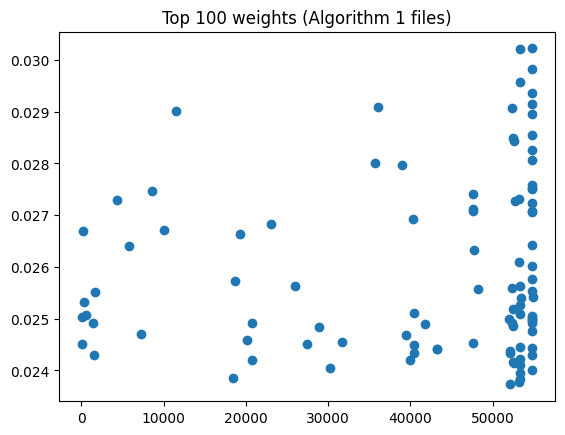

In [20]:
df4['original string'] = df4['idx'].apply(get_string_back)
df4.sort_values(by = 'max weight', ascending = False)
M = df4.sort_values(by = 'max weight', ascending = False)
plt.scatter(M['idx'][:100], M['max weight'][:100])
plt.title("Top 100 weights (Algorithm 1 files)")

### Algorithm 2 Files

Text(0.5, 1.0, 'Top 100 weights (Algorithm 2 files)')

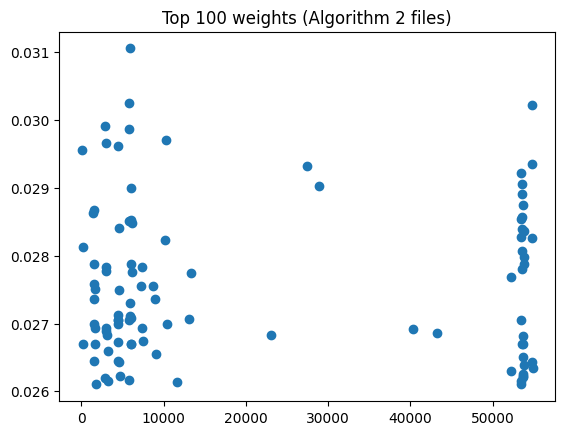

In [21]:
df5 = pd.DataFrame(df.loc[df['algo2'] == 1]['enumerated'])#this is a selection of the algorithm 2 files
df5 = df5.rename(columns = {0: 'enumerated'}) 
def nonzero(row):
    return np.nonzero(np.array(row))
df5['nonzero indices'] = df5['enumerated'].apply(nonzero) 
possible_nonzeros = set()
for row in df5['nonzero indices']:
    for item in row:
        possible_nonzeros.update(item)
df5 = pd.DataFrame(possible_nonzeros)
df5 = df5.rename(columns ={0: 'idx'})
df5['max weight'] = df5['idx'].apply(get_max)
df5['original string'] = df5['idx'].apply(get_string_back)
N = df5.sort_values(by = 'max weight', ascending = False)
plt.scatter(N['idx'][:100], N['max weight'][:100])
plt.title("Top 100 weights (Algorithm 2 files)")

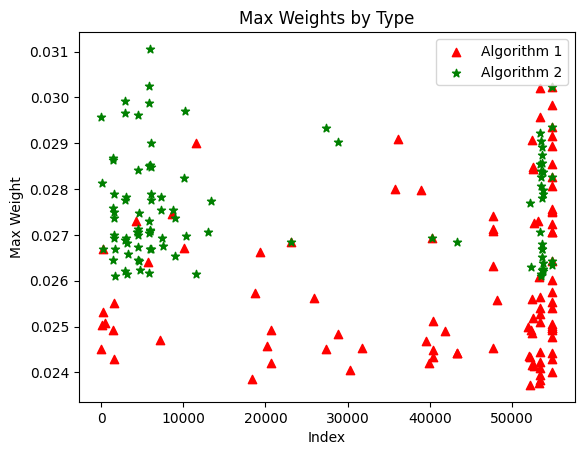

In [22]:
plt.scatter(M['idx'][:100], M['max weight'][:100], c='red', marker = '^')
plt.scatter(N['idx'][:100], N['max weight'][:100], c = 'green', marker = '*')
plt.title('Max Weights by Type')
plt.xlabel('Index')
plt.ylabel('Max Weight')
plt.legend(["Algorithm 1", 'Algorithm 2'], bbox_to_anchor = (1 , 1))
plt.show() #it's a chart

In [23]:
print(M[:100].to_string())

       idx  max weight original string
3    54797    0.030222             *#1
106  53388    0.030203             ###
21   54812    0.029829             *#g
90   53372    0.029575             ##k
4    54798    0.029358             *#2
36   54822    0.029153             *#q
147  36060    0.029092             o##
116  52377    0.029069             #ad
159  11512    0.029010             7##
2    54796    0.028947             *#0
235  54831    0.028554             *#z
182  52514    0.028484             #d#
197  52552    0.028427             #e#
6    54800    0.028259             *#4
41   54827    0.028072             *#v
216  35695    0.028006             ord
26   38948    0.027974             q##
28   54818    0.027574             *#m
18   54809    0.027530             *#d
204  54817    0.027505             *#l
240   8624    0.027463             5##
110  47654    0.027417             x02
253  53198    0.027310             #v#
141   4292    0.027292             2##
242  52666    0.027265   

In [24]:
print(N[:100].to_string())

       idx  max weight original string
813   5936    0.031056             448
767   5816    0.030256             412
678  54797    0.030222             *#1
379   2896    0.029911             208
749   5776    0.029876             400
869  10220    0.029708             72#
417   2966    0.029656             222
162   4444    0.029615             32#
12      38    0.029562             010
679  54798    0.029358             *#2
340  27380    0.029326             i#k
48   53399    0.029219             #*9
111  53512    0.029058             *28
68   28878    0.029034             j*#
838   6042    0.029000             470
148  53580    0.028912             *40
179  53624    0.028751             *56
644   1484    0.028679             112
622   1445    0.028625             101
160  53589    0.028566             *49
43   53394    0.028542             #*4
825   6002    0.028530             45#
751   5780    0.028506             404
865   6116    0.028480             48#
209   4529    0.028412   

## Coloring Top Ten Values

In [25]:
def fileDeal(file): #converts a file to just lowercase letters and changes all non-alpha characters to # (spaces are *)
    nfile = ""
    for char in file:
        if char.isalpha():
            nfile += char.lower()
        elif char.isnumeric():
            nfile += char
        elif char.isspace():
            nfile += "*"
        else:
            nfile += "#"
    return nfile

def makeVector(file): #this converts the character string to a set of all of the three-character combinations that are in the character string
    newfile = fileDeal(file)
    featureSet = set(())
    i = 0
    while i < (len(newfile)-2):
        featureSet.add(newfile[i:i+3])
        i+=1
    return featureSet

import re
from colorama import Fore, init, Back, Style

def regexpressionmaker(sequence):
    newregex = '' 
    for char in sequence:
        if char == '#' or char == '*': #sometimes things are weird
            newregex += r'\W' #this should keep the backslash where it is
        else:
            newregex += char #numbers and letters
    return newregex

In [26]:
def HighlightTopWeights(f, num, verbose):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    nonz = nonzero(v) #gets the nonzero indices of the vector
    nonzdf = pd.DataFrame(nonz)
    nonzdf = nonzdf.transpose() #switches x and y axes
    #this is not absolute value because there are very few negative weights
    nonzdf['max weight'] = nonzdf[1].apply(get_max)
    #same thing here no absolute value
    ranked = nonzdf.sort_values(by = 'max weight', ascending = False)[:num] #get the top # of the max weights
    ranked['original str'] = ranked[1].apply(get_string_back)
    
    #this segment makes the regular expressions from the strings
    sequences = list(ranked['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    
    if verbose:
        print(re.sub(regex, Fore.RED+ r'\1' + Fore.RESET, fil))
    return regex

In [27]:
filename = '/kaggle/input/script-2/script2algo1key1.py'
HighlightTopWeights(filename, 30, True)


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['k', 'o', 'r', 'q', 't', 'v', '"', 'q', 'u', '\x0c', 'k', 'o', 'r', 'q', 't', 'v', '"', 't', 'c', 'p', 'f', 'q', 'o', '\x0c', 'f', 'g', 'h', '"', 'j', 'c', 'p', 'i', 'o', 'c', 'p', '*', 'y', 'q', 't', 'f', '.', '"', 'y', 't', 'q', 'p', 'i', 'u', '.', '"', 't', 'k', 'i', 'j', 'v', 'u', '.', '"', 'n', 'g', 'v', 'v', 'g', 't', 'u', '+', '<', '\x0c', '"', '"', '"', '"', 'k', 'h', '"', 'y', 't', 'q', 'p', 'i', 'u', '@', '2', '<', '\x0c', '"', '"', '"', '"', '"', '"', '"', '"', 'r', 't', 'k', 'p', 'v', '*', '$', 'K', 'p', 'e', 'q', 't', 't', 'g', 'e', 'v', '"', 'i', 'w', 'g', 'u', 'u', 'g', 'u', '<', '"', '$', '.', '"', 'n', 'g', 'v', 'v', 'g', 't', 'u', '+', '\x0c', '"', '"', '"', '"', '%', '%', 'o', 'c', 'm', 'g', '"', 'v', 'j', 'g', '"', 'p', 'q', 'q', 'u', 'g', '1', 'j', 'c', 'p', 'i', 'o', 'c', 'p', '\x0c', '"', '"', '"

re.compile(r'(\W\W\W|\W\Wk|o\W\W|\Wad|7\W\W|\Wd\W|\We\W|ord|q\W\W|5\W\W|\Wv\W|2\W\W|\Wh\W|ryp|dd\W|3\W\W|\Ww\W|or\W|c\Wd|\W\W2|\W\Ww|h\W\W|xec|\W\Wx|\Wc\W|\W\Wn|0c\W|0\W\W|ecr|\W8\W)',
           re.UNICODE)

In [28]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
HighlightTopWeights(filename, 10, True)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(\W\W\W|208|222|32\W|\W\Wk|i\Wk|48\W|70\W|242|218)', re.UNICODE)

In [29]:
def hlWeightsinSeq(f, num, verbose, k):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    nonz = nonzero(v) #gets the nonzero indices of the vector
    nonzdf = pd.DataFrame(nonz)
    nonzdf = nonzdf.transpose() #switches x and y axes
    #this is not absolute value because there are very few negative weights
    nonzdf['max weight'] = nonzdf[1].apply(get_max)
    #same thing here no absolute value
    ranked = nonzdf.sort_values(by = 'max weight', ascending = False)[:num] #get the top # of the max weights
    ranked['original str'] = ranked[1].apply(get_string_back)
    
    #this segment makes the regular expressions from the strings
    sequences = list(ranked['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    matches = re.finditer(regex, fil)
    new_pairs = []
    first = True
    #this only keeps matches that are within k distance of another match
    for i in matches:
        sp = i.span()
        if (not first) and (sp[0] <= pre_sp[1] + k):
            new_pairs.append((pre_sp, sp))
        pre_sp = sp
        first = False

    if verbose:
        #initialize variables
        last = 0
        
        for p in new_pairs: 
            print(fil[last:p[0][0]], end="")
            print(Back.RED, end='')
            print(fil[max(last, p[0][0]):p[1][1]], end='')
            last = p[1][1]
            print(Style.RESET_ALL, end='')
        print(fil[last:])
    return regex

In [30]:
filename = '/kaggle/input/script-2/script2algo1key1.py'
hlWeightsinSeq(filename, 10, True, 1)


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['k', 'o', 'r', 'q', 't', 'v', '"', 'q', 'u', '\x0c', 'k', 'o', 'r', 'q', 't', 'v', '"', 't', 'c', 'p', 'f', 'q', 'o', '\x0c', 'f', 'g', 'h', '"', 'j', 'c', 'p', 'i', 'o', 'c', 'p', '*', 'y', 'q', 't', 'f', '.', '"', 'y', 't', 'q', 'p', 'i', 'u', '.', '"', 't', 'k', 'i', 'j', 'v', 'u', '.', '"', 'n', 'g', 'v', 'v', 'g', 't', 'u', '+', '<', '\x0c', '"', '"', '"', '"', 'k', 'h', '"', 'y', 't', 'q', 'p', 'i', 'u', '@', '2', '<', '\x0c', '"', '"', '"', '"', '"', '"', '"', '"', 'r', 't', 'k', 'p', 'v', '*', '$', 'K', 'p', 'e', 'q', 't', 't', 'g', 'e', 'v', '"', 'i', 'w', 'g', 'u', 'u', 'g', 'u', '<', '"', '$', '.', '"', 'n', 'g', 'v', 'v', 'g', 't', 'u', '+', '\x0c', '"', '"', '"', '"', '%', '%', 'o', 'c', 'm', 'g', '"', 'v', 'j', 'g', '"', 'p', 'q', 'q', 'u', 'g', '1', 'j', 'c', 'p', 'i', 'o', 'c', 'p', '\x0c', '"', '"', '"

re.compile(r'(\W\W\W|\W\Wk|o\W\W|\Wad|7\W\W|\Wd\W|\We\W|ord|q\W\W|5\W\W)',
           re.UNICODE)

In [31]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
hlWeightsinSeq(filename, 20, True, 2)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(\W\W\W|208|222|32\W|\W\Wk|i\Wk|48\W|70\W|242|218|2\W\W|90\W|238|ryp|210|t\Wi|6\W\W|46\W|\W70|200)',
           re.UNICODE)

## Let's See if We Can Get Better Results by Following Gradients

In [32]:
#this is the platform that keras is built on
import tensorflow as tf
def get_gradient(idx):
    return ar[0][winner_class][0][idx]

In [33]:
def HighlightTopGradients(f, num, verbose, absolutevalue, maxgrads):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    x = list(v) 
    x_t = tf.cast(x, tf.float32) #this line is necessary for the gradientTape to work
    with tf.GradientTape() as t:
        t.watch(x_t)
        y = model(x_t)
    global ar 
    ar = np.array(t.jacobian(y, x_t))
    nonz = nonzero(v)
    nonzdf = pd.DataFrame(nonz)
    nonzdf = nonzdf.transpose()
    global winner_class
    winner_class = np.argmax(y)
    nonzdf['gradient'] = nonzdf[1].apply(get_gradient)
    if absolutevalue:
        nonzdf['gradient'] = nonzdf['gradient'].apply(abs)
    rankeddown = nonzdf.sort_values(by = 'gradient', ascending = not(maxgrads))[:num]
    rankeddown['original str'] = rankeddown[1].apply(get_string_back)
    sequences = list(rankeddown['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    if verbose:
        #this will highlight the sequences with the highest gradients in the input
        print(re.sub(regex, Fore.RED+ r'\1' + Fore.RESET, fil))
    return regex

In [34]:
def hlgradsinsequence(f, num, verbose, absolutevalue, maxgrads, k):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    x = list(v) 
    
    x_t = tf.cast(x, tf.float32) #this line is necessary for the gradientTape to work
    with tf.GradientTape() as t:
        t.watch(x_t)
        y = model(x_t)
    global ar 
    ar = np.array(t.jacobian(y, x_t))
    nonz = nonzero(v)
    nonzdf = pd.DataFrame(nonz)
    nonzdf = nonzdf.transpose()
    global winner_class
    winner_class = np.argmax(y)
    nonzdf['gradient'] = nonzdf[1].apply(get_gradient)
    
    if absolutevalue:
        nonzdf['gradient'] = nonzdf['gradient'].apply(abs)
    rankeddown = nonzdf.sort_values(by = 'gradient', ascending = not(maxgrads))[:num]
    rankeddown['original str'] = rankeddown[1].apply(get_string_back)
    
    sequences = list(rankeddown['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    
    matches = re.finditer(regex, fil)
    new_pairs = []
    first = True
    #this only keeps matches that are within k distance of another match
    for i in matches:
        sp = i.span()
        if (not first) and (sp[0] <= pre_sp[1] + k):
            new_pairs.append((pre_sp, sp))
        pre_sp = sp
        first = False

    if verbose:
        #initialize variables
        last = 0
        
        for p in new_pairs: 
            print(fil[last:p[0][0]], end="")
            print(Back.RED, end='')
            print(fil[max(last, p[0][0]):p[1][1]], end='')
            last = p[1][1]
            print(Style.RESET_ALL, end='')
        print(fil[last:])
    return regex

In [35]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
HighlightTopGradients(filename, 30, True, False, True)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(222|t\Wi|46\W|70\W|174|210|204|32\W|202|218|90\W|\W21|06\W|228|80\W|160|184|238|r\Wj|198|86\W|14\W|220|242|48\W|nt\W|84\W|18\W|116|\W17)',
           re.UNICODE)

In [36]:
hlgradsinsequence(filename, 20, True, False, True, 2)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(222|t\Wi|46\W|70\W|174|210|204|32\W|202|218|90\W|\W21|06\W|228|80\W|160|184|238|r\Wj|198)',
           re.UNICODE)

In [37]:
filename = '/kaggle/input/script-5-algo-1-key-4/script5algo1key4.py'
print(HighlightTopGradients(filename, 30, True, False, True))


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['(', 'k', 'w', 't', 'r', '%', 'm', 'y', 'y', 'u', 'x', '?', '4', '4', '|', '|', '|', '3', 'l', 'j', 'j', 'p', 'x', 'k', 't', 'w', 'l', 'j', 'j', 'p', 'x', '3', 't', 'w', 'l', '4', 'x', 's', 'f', 'p', 'j', '2', 'l', 'f', 'r', 'j', '2', 'n', 's', '2', 'u', '~', 'y', 'm', 't', 's', '2', 'z', 'x', 'n', 's', 'l', '2', 'u', '~', 'l', 'f', 'r', 'j', '2', 'r', 't', 'i', 'z', 'q', 'j', '4', '\x0f', '\x0f', '(', '%', 'n', 'r', 'u', 't', 'w', 'y', 'n', 's', 'l', '%', 'q', 'n', 'g', 'w', 'f', 'w', 'n', 'j', 'x', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'u', '~', 'l', 'f', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'y', 'n', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'w', 'f', 's', 'i', 't', 'r', '\x0f', '\x0f', 'x', 's', 'f', 'p', 'j', 'd', 'x', 'u', 'j', 'j', 'i', '%', 'B', '%', '6', ':', '\x0f', '\x0f', '('

In [38]:
hlgradsinsequence(filename, 20, True, False, True, 6)


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['(', 'k', 'w', 't', 'r', '%', 'm', 'y', 'y', 'u', 'x', '?', '4', '4', '|', '|', '|', '3', 'l', 'j', 'j', 'p', 'x', 'k', 't', 'w', 'l', 'j', 'j', 'p', 'x', '3', 't', 'w', 'l', '4', 'x', 's', 'f', 'p', 'j', '2', 'l', 'f', 'r', 'j', '2', 'n', 's', '2', 'u', '~', 'y', 'm', 't', 's', '2', 'z', 'x', 'n', 's', 'l', '2', 'u', '~', 'l', 'f', 'r', 'j', '2', 'r', 't', 'i', 'z', 'q', 'j', '4', '\x0f', '\x0f', '(', '%', 'n', 'r', 'u', 't', 'w', 'y', 'n', 's', 'l', '%', 'q', 'n', 'g', 'w', 'f', 'w', 'n', 'j', 'x', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'u', '~', 'l', 'f', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'y', 'n', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'w', 'f', 's', 'i', 't', 'r', '\x0f', '\x0f', 'x', 's', 'f', 'p', 'j', 'd', 'x', 'u', 'j', 'j', 'i', '%', 'B', '%', '6', ':', '\x0f', '\x0f', '('

re.compile(r'(\Wd\W|2\W\W|\W\Wk|\Wh\W|6\W\W|\Wad|\Wv\W|x0f|h\W\W|3\W\W|q\W\W|j\W\W|\W9\W|7\W\W|\W3\W|dd\W|d\W\W|u\W\W|add|\Wch)',
           re.UNICODE)

### The above highlights the sequences with the top gradients *in the file*. What happens if we highlight the sequences in the file that are part of the top gradients overall?

In [39]:
def hloveralltopgrads(f, num, verbose, absolutevalue):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    x = list(v) 
    x_t = tf.cast(x, tf.float32) #this line is necessary for the gradientTape to work
    with tf.GradientTape() as t:
        t.watch(x_t)
        y = model(x_t)

    dy_dx = t.jacobian(y, x_t)
    global ar
    ar = np.array(dy_dx) #ar is short for array
    winner_class = 1
    gradsdf = pd.DataFrame(dy_dx[0][winner_class][0])
    if absolutevalue:
        gradsdf[0] = gradsdf[0].apply(abs)
    ranked = gradsdf.sort_values(by = 0, ascending = False)[:num]
    ranked['idx'] = ranked.index #need this in order to be able to manipulate things
    ranked['original str'] = ranked['idx'].apply(get_string_back)
    sequences = list(ranked['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    #this will highlight the sequences with the highest gradients in the input
    if verbose:
        print(re.sub(regex, Fore.RED+ r'\1' + Fore.RESET, fil))
    return regex

In [40]:
def overalltopgradsinseq(f, num, verbose, absolutevalue, k):
    if num <= 0:
        print("Error")
        return
    with open(f) as file:
        fil = file.read()
    file = fileDeal(fil)
    v = str(makeVector(file))
    v = np.array(transformVector(v))
    v = v.reshape(1, -1)
    x = list(v) 
    x_t = tf.cast(x, tf.float32) #this line is necessary for the gradientTape to work
    with tf.GradientTape() as t:
        t.watch(x_t)
        y = model(x_t)

    dy_dx = t.jacobian(y, x_t)
    global ar
    ar = np.array(dy_dx) #ar is short for array
    winner_class = 1
    gradsdf = pd.DataFrame(dy_dx[0][winner_class][0])
    if absolutevalue:
        gradsdf[0] = gradsdf[0].apply(abs)
    ranked = gradsdf.sort_values(by = 0, ascending = False)[:num]
    ranked['idx'] = ranked.index #need this in order to be able to manipulate things
    ranked['original str'] = ranked['idx'].apply(get_string_back)
    sequences = list(ranked['original str'])
    regexes = []
    for seq in sequences:
        regexes.append(regexpressionmaker(seq))
    sep = '|'
    regexes = sep.join(regexes)
    regexes = '(' + regexes + ')'
    regex = re.compile(regexes)
    matches = re.finditer(regex, fil)
    new_pairs = []
    first = True
    #this only keeps matches that are within k distance of another match
    for i in matches:
        sp = i.span()
        if (not first) and (sp[0] <= pre_sp[1] + k):
            new_pairs.append((pre_sp, sp))
        pre_sp = sp
        first = False

    if verbose:
        #initialize variables
        last = 0
        
        for p in new_pairs: 
            print(fil[last:p[0][0]], end="")
            print(Back.RED, end='')
            print(fil[max(last, p[0][0]):p[1][1]], end='')
            last = p[1][1]
            print(Style.RESET_ALL, end='')
        print(fil[last:])
    return regex

In [41]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
hloveralltopgrads(filename, 20, True, False)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(448|222|\W40|693|j\W\W|\W18|\W\W7|\W28|040|400|\W91|t\Wi|\W22|\W89|150|468|408|\W19|46\W|252)',
           re.UNICODE)

In [42]:
overalltopgradsinseq(filename, 20, True, False, 6)


def decrypt(f, k):
            decrypted = ""
            for i in f:
                j = int(i/k)
                decrypted += chr(j)
            return decrypted
        
cipher = [210, 218, 224, 222, 228, 232, 64, 222, 230, 20, 210, 218, 224, 222, 228, 232, 64, 228, 194, 220, 200, 222, 218, 20, 200, 202, 204, 64, 208, 194, 220, 206, 218, 194, 220, 80, 238, 222, 228, 200, 88, 64, 238, 228, 222, 220, 206, 230, 88, 64, 228, 210, 206, 208, 232, 230, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 116, 20, 64, 64, 64, 64, 210, 204, 64, 238, 228, 222, 220, 206, 230, 124, 96, 116, 20, 64, 64, 64, 64, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 146, 220, 198, 222, 228, 228, 202, 198, 232, 64, 206, 234, 202, 230, 230, 202, 230, 116, 64, 68, 88, 64, 216, 202, 232, 232, 202, 228, 230, 82, 20, 64, 64, 64, 64, 70, 70, 218, 194, 214, 202, 64, 232, 208, 202, 64, 220, 222, 222, 230, 202, 94, 208, 194, 220, 206, 218, 194, 220, 20, 64, 64, 64, 64, 224, 228, 210, 220, 232, 80, 68, 64, 64, 190, 19

re.compile(r'(448|222|\W40|693|j\W\W|\W18|\W\W7|\W28|040|400|\W91|t\Wi|\W22|\W89|150|468|408|\W19|46\W|252)',
           re.UNICODE)

In [43]:
filename = '/kaggle/input/script-5-algo-1-key-4/script5algo1key4.py'
hloveralltopgrads(filename, 20, True, False)


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['(', 'k', 'w', 't', 'r', '%', 'm', 'y', 'y', 'u', 'x', '?', '4', '4', '|', '|', '|', '3', 'l', 'j', 'j', 'p', 'x', 'k', 't', 'w', 'l', 'j', 'j', 'p', 'x', '3', 't', 'w', 'l', '4', 'x', 's', 'f', 'p', 'j', '2', 'l', 'f', 'r', 'j', '2', 'n', 's', '2', 'u', '~', 'y', 'm', 't', 's', '2', 'z', 'x', 'n', 's', 'l', '2', 'u', '~', 'l', 'f', 'r', 'j', '2', 'r', 't', 'i', 'z', 'q', 'j', '4', '\x0f', '\x0f', '(', '%', 'n', 'r', 'u', 't', 'w', 'y', 'n', 's', 'l', '%', 'q', 'n', 'g', 'w', 'f', 'w', 'n', 'j', 'x', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'u', '~', 'l', 'f', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'y', 'n', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'w', 'f', 's', 'i', 't', 'r', '\x0f', '\x0f', 'x', 's', 'f', 'p', 'j', 'd', 'x', 'u', 'j', 'j', 'i', '%', 'B', '%', '6', ':', '\x0f', '\x0f', '('

re.compile(r'(448|222|\W40|040|\W22|\W89|400|\W28|j\W\W|\W\W4|468|693|70\W|52\W|\W19|\W\W1|\W18|\W91|210|\W\W7)',
           re.UNICODE)

In [44]:
overalltopgradsinseq(filename, 20, True, False, 6)


def decrypt(f, k):
        decrypted = ""
        for i in f:
            decrypted = decrypted.__add__(chr((ord(i)-k)%128))
        return decrypted
        
cipher = ['(', 'k', 'w', 't', 'r', '%', 'm', 'y', 'y', 'u', 'x', '?', '4', '4', '|', '|', '|', '3', 'l', 'j', 'j', 'p', 'x', 'k', 't', 'w', 'l', 'j', 'j', 'p', 'x', '3', 't', 'w', 'l', '4', 'x', 's', 'f', 'p', 'j', '2', 'l', 'f', 'r', 'j', '2', 'n', 's', '2', 'u', '~', 'y', 'm', 't', 's', '2', 'z', 'x', 'n', 's', 'l', '2', 'u', '~', 'l', 'f', 'r', 'j', '2', 'r', 't', 'i', 'z', 'q', 'j', '4', '\x0f', '\x0f', '(', '%', 'n', 'r', 'u', 't', 'w', 'y', 'n', 's', 'l', '%', 'q', 'n', 'g', 'w', 'f', 'w', 'n', 'j', 'x', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'u', '~', 'l', 'f', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'y', 'n', 'r', 'j', '\x0f', 'n', 'r', 'u', 't', 'w', 'y', '%', 'w', 'f', 's', 'i', 't', 'r', '\x0f', '\x0f', 'x', 's', 'f', 'p', 'j', 'd', 'x', 'u', 'j', 'j', 'i', '%', 'B', '%', '6', ':', '\x0f', '\x0f', '('

re.compile(r'(448|222|\W40|040|\W22|\W89|400|\W28|j\W\W|\W\W4|468|693|70\W|52\W|\W19|\W\W1|\W18|\W91|210|\W\W7)',
           re.UNICODE)

## Function to determine if the explainer picks up on the signature:

In [45]:
def determineMatch(regx, categ):
    signatures = ['__add_(chr((ord(i)-k)%128))', 'j= int(i/k)'] #these are slightly edited from how they appear in the code because I don't want three non-word chars to match
    if regx.search(signatures[categ]):
        print( "Signature Match")
        return True
    else:
        print("No signature match")
        return False

In [46]:
filename = '/kaggle/input/script-5-algo-1-key-4/script5algo1key4.py'
winclass = 0
for i in [30, 20, 10, 5, 1]:
    print("Top {} Gradients:".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, False, True), winclass)
    print("Top {} Gradients (Absolute value):".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, True, True), winclass)
    print("Min {} Gradients:".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, False, False), winclass)
    print("Top {} Weights:".format(i))
    determineMatch(HighlightTopWeights(filename, i, False), winclass)
    print("Top {} Overall Gradients:".format(i))
    determineMatch(hloveralltopgrads(filename, i, False, False), winclass)
    print("Top {} Overall Gradients (Absolute Value):".format(i))
    determineMatch(hloveralltopgrads(filename, i, False, True), winclass)

Top 30 Gradients:
Signature Match
Top 30 Gradients (Absolute value):
Signature Match
Min 30 Gradients:
No signature match
Top 30 Weights:
Signature Match
Top 30 Overall Gradients:
Signature Match
Top 30 Overall Gradients (Absolute Value):
Signature Match
Top 20 Gradients:
Signature Match
Top 20 Gradients (Absolute value):
Signature Match
Min 20 Gradients:
No signature match
Top 20 Weights:
Signature Match
Top 20 Overall Gradients:
Signature Match
Top 20 Overall Gradients (Absolute Value):
Signature Match
Top 10 Gradients:
Signature Match
Top 10 Gradients (Absolute value):
Signature Match
Min 10 Gradients:
No signature match
Top 10 Weights:
Signature Match
Top 10 Overall Gradients:
No signature match
Top 10 Overall Gradients (Absolute Value):
Signature Match
Top 5 Gradients:
Signature Match
Top 5 Gradients (Absolute value):
Signature Match
Min 5 Gradients:
No signature match
Top 5 Weights:
Signature Match
Top 5 Overall Gradients:
No signature match
Top 5 Overall Gradients (Absolute Valu

In [47]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
winclass = 1
for i in [30, 20, 10, 5, 1]:
    print("Top {} Gradients:".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, False, True), winclass)
    print("Top {} Gradients (Absolute value):".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, True, True), winclass)
    print("Min {} Gradients:".format(i))
    determineMatch(HighlightTopGradients(filename, i, False, False, False), winclass)
    print("Top {} Weights:".format(i))
    determineMatch(HighlightTopWeights(filename, i, False), winclass)
    print("Top {} Overall Gradients:".format(i))
    determineMatch(hloveralltopgrads(filename, i, False, False), winclass)
    print("Top {} Overall Gradients (Absolute Value):".format(i))
    determineMatch(hloveralltopgrads(filename, i, False, True), winclass)

Top 30 Gradients:
Signature Match
Top 30 Gradients (Absolute value):
Signature Match
Min 30 Gradients:
Signature Match
Top 30 Weights:
Signature Match
Top 30 Overall Gradients:
Signature Match
Top 30 Overall Gradients (Absolute Value):
Signature Match
Top 20 Gradients:
Signature Match
Top 20 Gradients (Absolute value):
Signature Match
Min 20 Gradients:
Signature Match
Top 20 Weights:
Signature Match
Top 20 Overall Gradients:
Signature Match
Top 20 Overall Gradients (Absolute Value):
Signature Match
Top 10 Gradients:
Signature Match
Top 10 Gradients (Absolute value):
Signature Match
Min 10 Gradients:
Signature Match
Top 10 Weights:
Signature Match
Top 10 Overall Gradients:
Signature Match
Top 10 Overall Gradients (Absolute Value):
Signature Match
Top 5 Gradients:
Signature Match
Top 5 Gradients (Absolute value):
Signature Match
Min 5 Gradients:
No signature match
Top 5 Weights:
No signature match
Top 5 Overall Gradients:
Signature Match
Top 5 Overall Gradients (Absolute Value):
Signatur

## Different Explainer

In [48]:
def determinePercent(regx, categ):
    #these are slightly edited from how they appear in the code because I don't want three non-word chars to match
    signatures = ['__add_(chr((ord(i)-k)%128))', 'j= int(i/k)']
    strlist = regx.findall(signatures[categ])
    strs = "".join(strlist)
    perc = (len(strs)/len(signatures[categ]))*100
    print(perc)
    return perc

In [49]:
filename = '/kaggle/input/script-5-algo-1-key-4/script5algo1key4.py'
winclass = 0
for i in [30, 20, 10, 5, 1]:
    print("Top {} Gradients:".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, False, True), winclass)
    print("Top {} Gradients (Absolute value):".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, True, True), winclass)
    print("Min {} Gradients:".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, False, False), winclass)
    print("Top {} Weights:".format(i))
    determinePercent(HighlightTopWeights(filename, i, False), winclass)
    print("Top {} Overall Gradients:".format(i))
    determinePercent(hloveralltopgrads(filename, i, False, False), winclass)
    print("Top {} Overall Gradients (Absolute Value):".format(i))
    determinePercent(hloveralltopgrads(filename, i, False, True), winclass)

Top 30 Gradients:
55.55555555555556
Top 30 Gradients (Absolute value):
55.55555555555556
Min 30 Gradients:
0.0
Top 30 Weights:
22.22222222222222
Top 30 Overall Gradients:
11.11111111111111
Top 30 Overall Gradients (Absolute Value):
33.33333333333333
Top 20 Gradients:
33.33333333333333
Top 20 Gradients (Absolute value):
33.33333333333333
Min 20 Gradients:
0.0
Top 20 Weights:
22.22222222222222
Top 20 Overall Gradients:
11.11111111111111
Top 20 Overall Gradients (Absolute Value):
33.33333333333333
Top 10 Gradients:
11.11111111111111
Top 10 Gradients (Absolute value):
11.11111111111111
Min 10 Gradients:
0.0
Top 10 Weights:
22.22222222222222
Top 10 Overall Gradients:
0.0
Top 10 Overall Gradients (Absolute Value):
11.11111111111111
Top 5 Gradients:
11.11111111111111
Top 5 Gradients (Absolute value):
11.11111111111111
Min 5 Gradients:
0.0
Top 5 Weights:
11.11111111111111
Top 5 Overall Gradients:
0.0
Top 5 Overall Gradients (Absolute Value):
11.11111111111111
Top 1 Gradients:
0.0
Top 1 Gradien

In [50]:
filename = '/kaggle/input/script2algo2/script2algo2key1.py'
winclass = 1
for i in [30, 20, 10, 5, 1]:
    print("Top {} Gradients:".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, False, True), winclass)
    print("Top {} Gradients (Absolute value):".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, True, True), winclass)
    print("Min {} Gradients:".format(i))
    determinePercent(HighlightTopGradients(filename, i, False, False, False), winclass)
    print("Top {} Weights:".format(i))
    determinePercent(HighlightTopWeights(filename, i, False), winclass)
    print("Top {} Overall Gradients:".format(i))
    determinePercent(hloveralltopgrads(filename, i, False, False), winclass)
    print("Top {} Overall Gradients (Absolute Value):".format(i))
    determinePercent(hloveralltopgrads(filename, i, False, True), winclass)

Top 30 Gradients:
27.27272727272727
Top 30 Gradients (Absolute value):
27.27272727272727
Min 30 Gradients:
27.27272727272727
Top 30 Weights:
27.27272727272727
Top 30 Overall Gradients:
54.54545454545454
Top 30 Overall Gradients (Absolute Value):
54.54545454545454
Top 20 Gradients:
27.27272727272727
Top 20 Gradients (Absolute value):
27.27272727272727
Min 20 Gradients:
27.27272727272727
Top 20 Weights:
27.27272727272727
Top 20 Overall Gradients:
54.54545454545454
Top 20 Overall Gradients (Absolute Value):
54.54545454545454
Top 10 Gradients:
27.27272727272727
Top 10 Gradients (Absolute value):
27.27272727272727
Min 10 Gradients:
27.27272727272727
Top 10 Weights:
27.27272727272727
Top 10 Overall Gradients:
27.27272727272727
Top 10 Overall Gradients (Absolute Value):
27.27272727272727
Top 5 Gradients:
27.27272727272727
Top 5 Gradients (Absolute value):
27.27272727272727
Min 5 Gradients:
0.0
Top 5 Weights:
0.0
Top 5 Overall Gradients:
27.27272727272727
Top 5 Overall Gradients (Absolute Valu